Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [51]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()

Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [15]:
import thinkstats2
pmf = thinkstats2.Pmf(resp.numkdhh, label='actual')

Display the PMF.

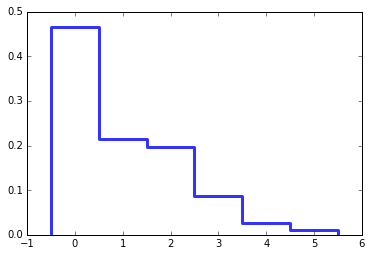

In [16]:
import thinkplot
thinkplot.Pmf(pmf)

Define <tt>BiasPmf</tt>.

In [10]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

In [17]:
bias_pmf = BiasPmf(pmf, label='observed')

Display the actual Pmf and the biased Pmf on the same axes.

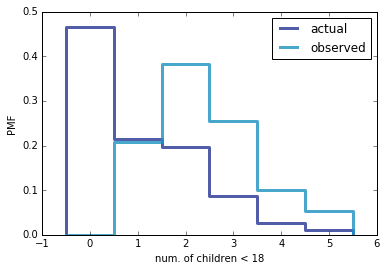

In [22]:
thinkplot.PrePlot(2)
thinkplot.pmfs([pmf, bias_pmf])
thinkplot.Show(xlabel='num. of children < 18', ylabel='PMF')

Compute the means of the two Pmfs.

In [20]:
pmf.Mean()

1.0242051550438309

In [21]:
bias_pmf.Mean()

2.4036791006642821

In [23]:
pmf.Items()

dict_items([(0, 0.46617820227659301), (1, 0.21405207379301322), (2, 0.19625801386889966), (3, 0.087138558157791451), (4, 0.025644380478869556), (5, 0.010728771424833181)])

In [25]:
def PmfMean(pmf):
    return sum(x_i * p_i for x_i, p_i in pmf.Items())

In [26]:
PmfMean(pmf)

1.0242051550438309

In [30]:
def PmfVar(pmf):
    mean = pmf.Mean()
    return sum(p_i * (x_i - mean)**2 for x_i, p_i in pmf.Items())

In [31]:
pmf.Var()

1.4128643263531195

In [32]:
PmfVar(pmf)

1.4128643263531195

In [33]:
import nsfg

In [34]:
nsfg.MakePregMap??

In [35]:
preg_map = nsfg.MakePregMap(resp)

In [44]:
multi_preg = {case_id: pregs for case_id, pregs in preg_map.items() if len(pregs) > 0}

In [56]:
preg = nsfg.ReadFemPreg()

In [59]:
live = preg[preg.outcome == 1]

In [122]:
def pair_wise_difference(live):
    multi_preg_map = {case_id: indices for case_id, indices in nsfg.MakePregMap(live).items() if len(indices) > 1}
    group_pregs = [live.prglngth[indices] for case_id, indices in multi_preg_map.items()]
    differences = [group.iloc[0] - group.iloc[1:].mean() for group in group_pregs]
    return differences

In [123]:
d = pair_wise_difference(live)

In [125]:
import pandas as pd
d_ = pd.Series(d)

In [127]:
d_.mean()

0.11807971854944718

In [128]:
d_.var()

9.2484189188410468

In [129]:
def Diffs(t):
    """List of differences between the first elements and others.

    t: list of numbers
    
    returns: list of numbers
    """
    first = t[0]
    rest = t[1:]
    diffs = [first - x for x in rest]
    return diffs


def PairWiseDifferences(live):
    """Summarize pairwise differences for children of the same mother.

    live: DataFrame of pregnancy records for live births
    """
    live = live[live.prglngth >= 37]
    preg_map = nsfg.MakePregMap(live)

    diffs = []
    for caseid, indices in preg_map.items():
        lengths = live.loc[indices].prglngth.values
        if len(lengths) >= 2:
            diffs.extend(Diffs(lengths))

    mean = thinkstats2.Mean(diffs)
    print('Mean difference between pairs', mean)

    pmf = thinkstats2.Pmf(diffs)
    thinkplot.Hist(pmf, align='center')
    thinkplot.Show(xlabel='Difference in weeks',
                   ylabel='PMF')

Mean difference between pairs 0.188505747126


/home/punchagan/.virtualenvs/py3/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


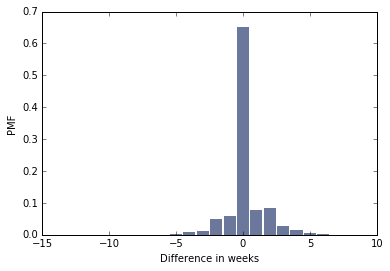

In [130]:
PairWiseDifferences(live)